In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
DF = pd.read_csv("F:/CB Git/machine-learning-online-2018/3. Linear Regression/Linear Regression/Train.csv")

In [5]:
data = DF.values

In [6]:
data.shape

(1600, 6)

In [7]:
X = data[:,:5]
y = data[:,5]

In [8]:
X.shape

(1600, 5)

In [9]:
ones = np.ones((X.shape[0],1))
X = np.hstack((ones,X))
X[:4,:5]

array([[ 1.        ,  0.29341624, -0.94559871, -0.42110515,  0.40681602],
       [ 1.        , -0.83608408, -0.18922804, -0.77640262, -1.05383124],
       [ 1.        ,  0.23642511,  0.13283602, -0.14772298,  0.69985396],
       [ 1.        ,  0.17531181,  0.14319424, -0.58111096, -0.12210693]])

In [10]:
X.shape,y.shape

((1600, 6), (1600,))

In [11]:
def hypothesis(X,theta):
    return np.dot(X,theta)

def error(X,y,theta):
    y_ = hypothesis(X,theta)
    error = 0.0
    m = X.shape[0]
    
    error = np.sum((y_-y)**2)
    return error/m

def gradient(X,y,theta):
    y_ = hypothesis(X,theta)
    m,n = X.shape
    grad = np.dot(X.T,(y_-y))
    return grad/m

def gradientDescent(X,y,lr=0.1,max_steps=300):
    m,n = X.shape
    theta = np.zeros((n,))
    error_list = []
    for i in range(max_steps):
        e = error(X,y,theta)
        error_list.append(e)
        
        grad = gradient(X,y,theta)
        theta = theta - lr*grad
        
    return theta, error_list

In [12]:
import time
start = time.time()
theta,error_list = gradientDescent(X,y)
end = time.time()
print("Time take by code: ",end-start)

Time take by code:  0.149092435836792


In [13]:
theta

array([ 4.99096674, 29.68187118, 92.66247759,  8.28062089, 44.76773522,
        2.51916121])

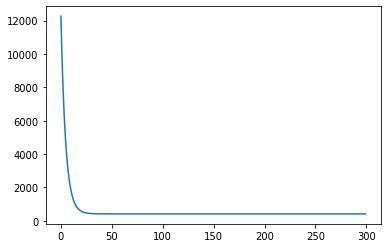

In [14]:
plt.plot(error_list)

In [15]:
y_ = hypothesis(X,theta)

In [16]:
def r2_squared(Y,Y_):
    num = np.sum((Y-Y_)**2)
    denom = np.sum((Y-Y.mean())**2)
    score = 1 - (num/denom)
    
    return score*100

In [17]:
r2_squared(y,y_)

96.60939669975616

In [18]:
x_test = pd.read_csv("F:/CB Git/machine-learning-online-2018/3. Linear Regression/Linear Regression/Test.csv")

In [19]:
ones = np.ones((x_test.shape[0],1))
x_test = np.hstack((ones,x_test))
x_test.shape

(400, 6)

In [20]:
y_test = hypothesis(x_test,theta)

In [111]:
df = pd.DataFrame(data=y_test,columns=["target"])

In [112]:
df = df.rename_axis(index='Id', columns="target")

In [113]:
df.to_csv('y_pred2.csv')

In [114]:
x_test.shape,y_test.shape

((400, 6), (400,))